In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns 
import warnings 
warnings.filterwarnings('ignore')


In [2]:
df = pd.read_csv(r'https://raw.githubusercontent.com/dsrscientist/dataset1/master/census_income.csv')

In [3]:
df

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [4]:
df.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [6]:
# Most of the columns are object datatype we need to change it later 

In [7]:
# lets check if there are any duplicates in data 
df.duplicated().sum()

24

In [8]:
# There are 24 duplicate entries let's delete these
df.drop_duplicates(keep='last' ,inplace = True)

In [9]:
df.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

In [10]:
df.sample(20)

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
12915,19,Private,279968,Some-college,10,Never-married,Adm-clerical,Own-child,White,Female,0,0,20,United-States,<=50K
22680,47,Local-gov,204377,Some-college,10,Never-married,Other-service,Own-child,White,Female,0,0,20,United-States,<=50K
3759,37,Self-emp-inc,291518,Bachelors,13,Married-civ-spouse,Craft-repair,Husband,White,Male,15024,0,55,United-States,>50K
15034,39,Private,322143,12th,8,Married-civ-spouse,Transport-moving,Husband,White,Male,15024,0,70,United-States,>50K
11983,46,Local-gov,125892,Some-college,10,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
14316,47,Private,236805,Some-college,10,Divorced,Sales,Unmarried,White,Female,0,0,60,United-States,<=50K
30398,54,Private,200783,Some-college,10,Married-civ-spouse,Sales,Husband,White,Male,0,0,40,United-States,<=50K
22968,44,State-gov,141858,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,15024,0,75,United-States,>50K
32441,25,Private,390657,Some-college,10,Never-married,Other-service,Not-in-family,Black,Male,0,0,40,United-States,<=50K
28492,25,Private,124111,Bachelors,13,Never-married,Adm-clerical,Own-child,White,Female,0,0,40,United-States,<=50K


In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,32536.0,38.585536,13.638193,17.0,28.0,37.0,48.00,90.0
Fnlwgt,32536.0,189784.298992,105556.258211,12285.0,117831.5,178356.0,236993.25,1484705.0
Education_num,32536.0,10.081725,2.571622,1.0,9.0,10.0,12.00,16.0
Capital_gain,32536.0,1078.410069,7388.068465,0.0,0.0,0.0,0.00,99999.0
Capital_loss,32536.0,87.370912,403.107737,0.0,0.0,0.0,0.00,4356.0
Hours_per_week,32536.0,40.440343,12.347079,1.0,40.0,40.0,45.00,99.0


In [12]:
# There maybe outliers in Capital gain Data as min value is 0 while max is 99999


In [13]:
# let's divide features in to numeric and categorical 
Numerical=['Age','Fnlwgt','Education_num','Capital_gain','Capital_loss','Hours_per_week']
Category=['Workclass','Education','Marital_status','Occupation','Relationship','Race','Sex','Native_country','Income']

In [14]:
Numerical

['Age',
 'Fnlwgt',
 'Education_num',
 'Capital_gain',
 'Capital_loss',
 'Hours_per_week']

In [15]:
Category

['Workclass',
 'Education',
 'Marital_status',
 'Occupation',
 'Relationship',
 'Race',
 'Sex',
 'Native_country',
 'Income']

In [16]:
# exploring variables in each categorical columns 
for i in Category:
    print(i)
    print(df[i].value_counts())
    print('-'*100)

Workclass
Workclass
 Private             22673
 Self-emp-not-inc     2540
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: count, dtype: int64
----------------------------------------------------------------------------------------------------
Education
Education
 HS-grad         10494
 Some-college     7282
 Bachelors        5352
 Masters          1722
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           645
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           332
 1st-4th           166
 Preschool          50
Name: count, dtype: int64
----------------------------------------------------------------------------------------------------
Marital_status
Marital_status
 Married-civ-spouse       14970
 Never-married            10666
 

In [17]:
# As we can see there are some ? symbol is in dataset 
df.isin([' ?']).sum()

Age                  0
Workclass         1836
Fnlwgt               0
Education            0
Education_num        0
Marital_status       0
Occupation        1843
Relationship         0
Race                 0
Sex                  0
Capital_gain         0
Capital_loss         0
Hours_per_week       0
Native_country     582
Income               0
dtype: int64

In [18]:
df=df.replace(' ?',np.NaN)

In [19]:
df.isnull().sum()

Age                  0
Workclass         1836
Fnlwgt               0
Education            0
Education_num        0
Marital_status       0
Occupation        1843
Relationship         0
Race                 0
Sex                  0
Capital_gain         0
Capital_loss         0
Hours_per_week       0
Native_country     582
Income               0
dtype: int64

In [20]:
# let's fill the Null values as all nulls are in categorial columns 
df['Occupation'].fillna(df['Occupation'].mode()[0],inplace=True)
df['Workclass'].fillna(df['Workclass'].mode()[0],inplace=True)
df['Native_country'].fillna(df['Native_country'].mode()[0],inplace=True)


In [21]:
df.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

In [22]:
# we can go forward as no missing value present 


In [23]:
# Let's do some crosstab analysis on Data 
pd.crosstab(df['Income'],df["Workclass"],margins=True)

Workclass,Federal-gov,Local-gov,Never-worked,Private,Self-emp-inc,Self-emp-not-inc,State-gov,Without-pay,All
Income,,,,,,,,,
<=50K,589,1476,7,19357,494,1816,944,14,24697
>50K,371,617,0,5152,622,724,353,0,7839
All,960,2093,7,24509,1116,2540,1297,14,32536


In [24]:
# Out of Total 24509 Employees who are earning less than 50k are more 19357 and they are in private jobs 
# some people who are not getting any pay may they are intern or something 


In [25]:
pd.crosstab(df['Education'],df["Workclass"], margins=True)

Workclass,Federal-gov,Local-gov,Never-worked,Private,Self-emp-inc,Self-emp-not-inc,State-gov,Without-pay,All
Education,,,,,,,,,
10th,6,31,2,795,19,67,13,0,933
11th,9,36,1,1041,14,60,14,0,1175
12th,5,19,0,373,7,19,10,0,433
1st-4th,0,4,0,146,2,13,1,0,166
5th-6th,1,9,0,295,4,19,4,0,332
7th-8th,2,28,1,495,14,94,10,1,645
9th,3,23,0,438,10,34,6,0,514
Assoc-acdm,55,88,0,776,35,71,41,1,1067
Assoc-voc,38,86,0,1066,38,108,46,0,1382


<Axes: ylabel='count'>

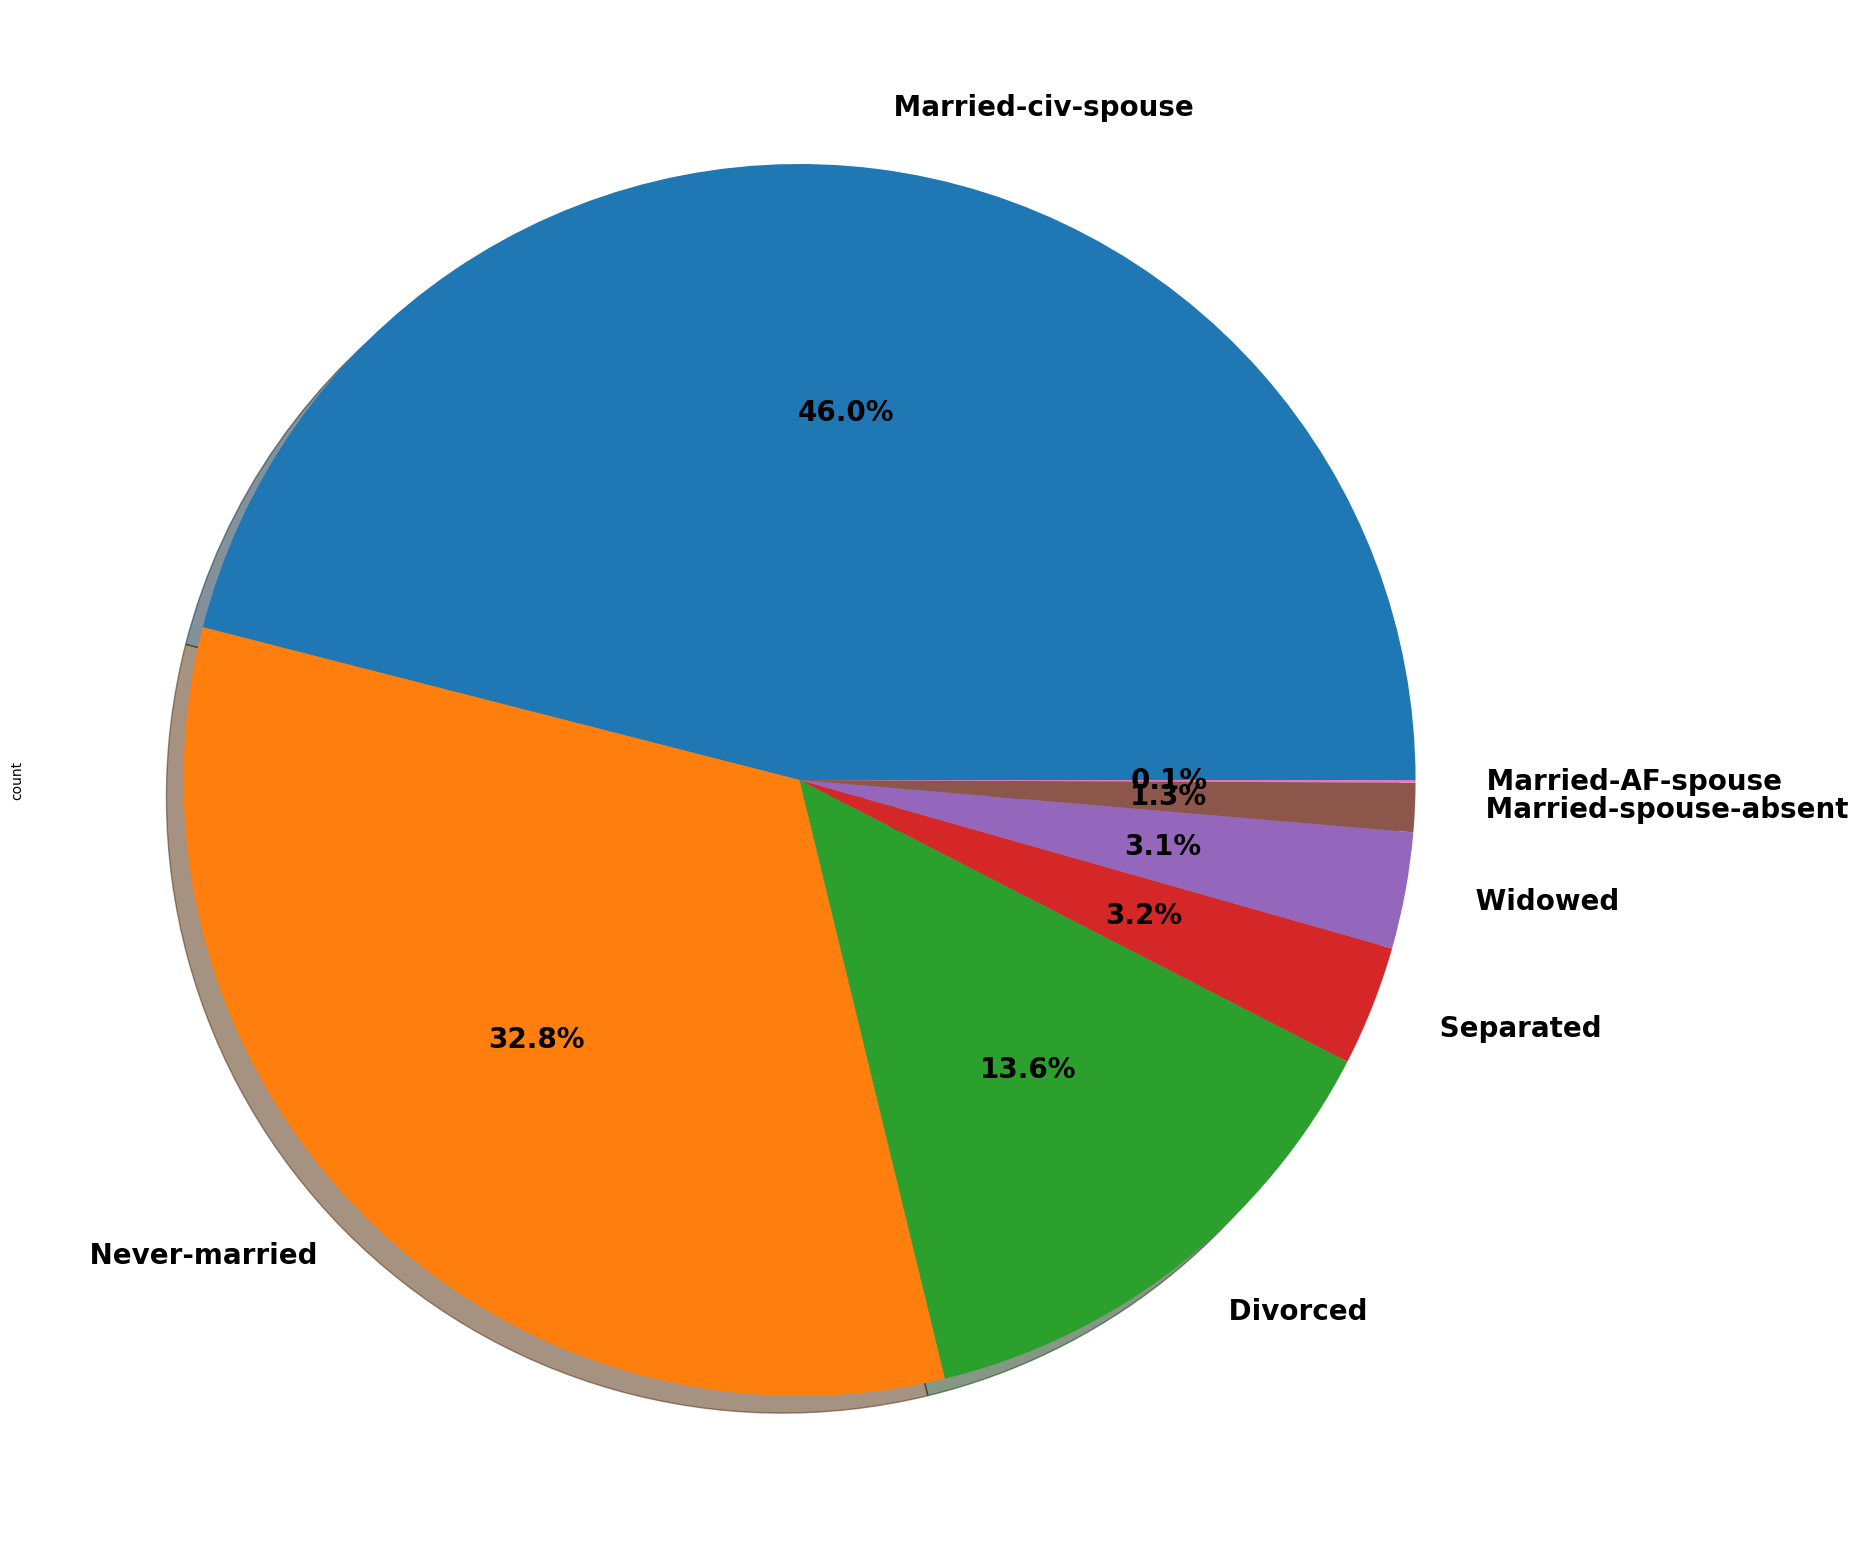

In [26]:
plt.figure(figsize=(20,20))
df['Marital_status'].value_counts().plot.pie(autopct='%2.1f%%', 
                                             textprops ={'fontsize':20,'fontweight':'bold'},shadow=True)

In [27]:
pd.crosstab(df['Marital_status'],df["Income"], margins=True)

Income,<=50K,>50K,All
Marital_status,,,
Divorced,3978,463,4441
Married-AF-spouse,13,10,23
Married-civ-spouse,8280,6690,14970
Married-spouse-absent,384,34,418
Never-married,10175,491,10666
Separated,959,66,1025
Widowed,908,85,993
All,24697,7839,32536


In [28]:
# Encoding categorical data into numerical 
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in Category:
    df[i] = le.fit_transform(df[i])
df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,5,83311,9,13,2,3,0,4,1,0,0,13,38,0
1,38,3,215646,11,9,0,5,1,4,1,0,0,40,38,0
2,53,3,234721,1,7,2,5,0,2,1,0,0,40,38,0
3,28,3,338409,9,13,2,9,5,2,0,0,0,40,4,0
4,37,3,284582,12,14,2,3,5,4,0,0,0,40,38,0


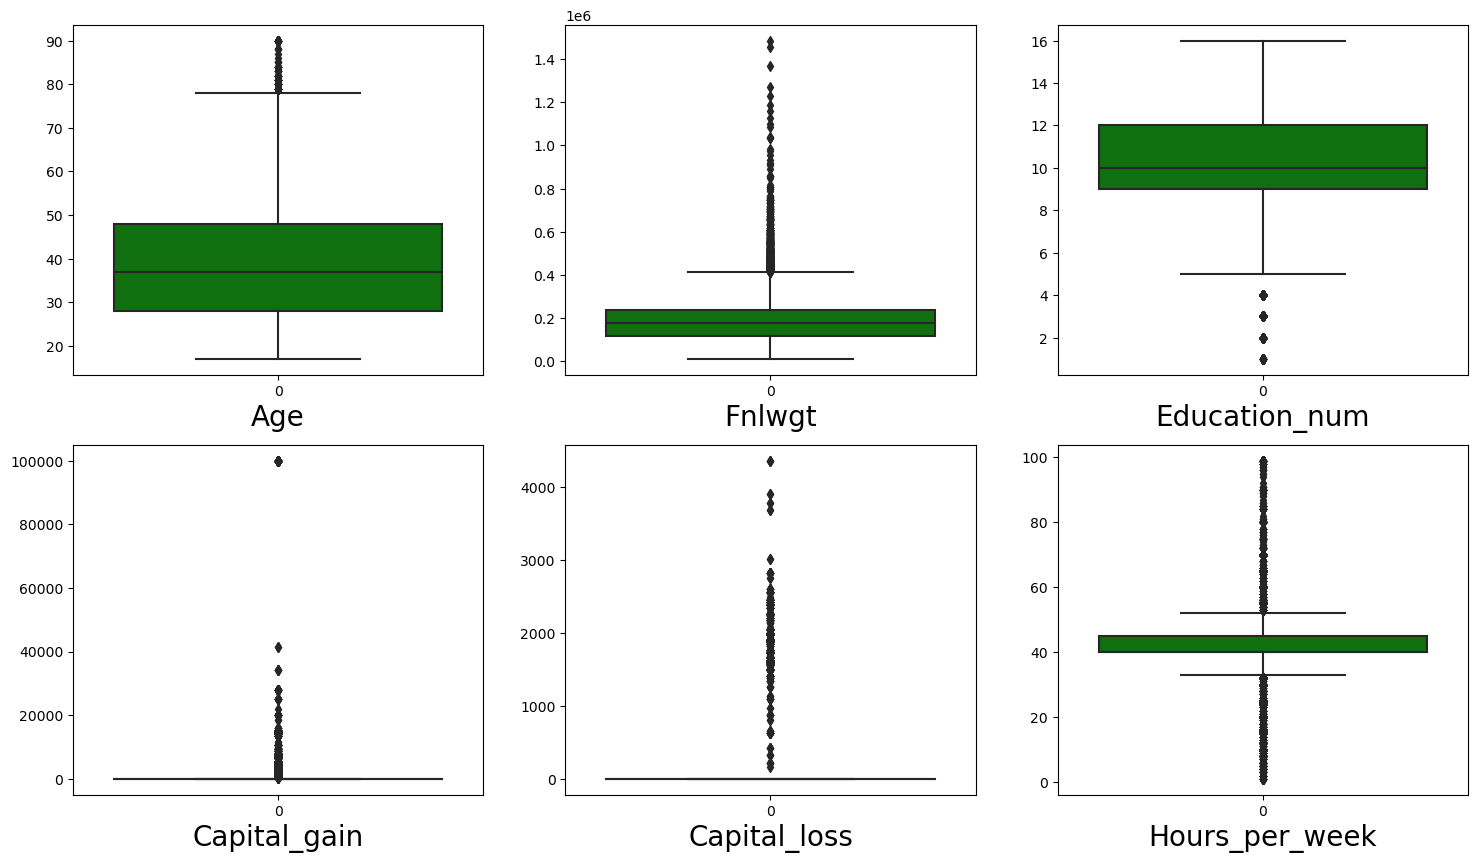

In [29]:
# plotting boxplot for outlier detection 
plt.figure(figsize=(18,10))
plotnumber=1

for column in Numerical:
    if plotnumber<=6:
        ax=plt.subplot(2,3,plotnumber)
        sns.boxplot(df[column],color='g')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

In [30]:
# outliers are present in data 
from scipy.stats import zscore
z = np.abs(zscore(df))
threshold = 3
df1 = df[(z<3).all(axis = 1)]
df = df1.copy()

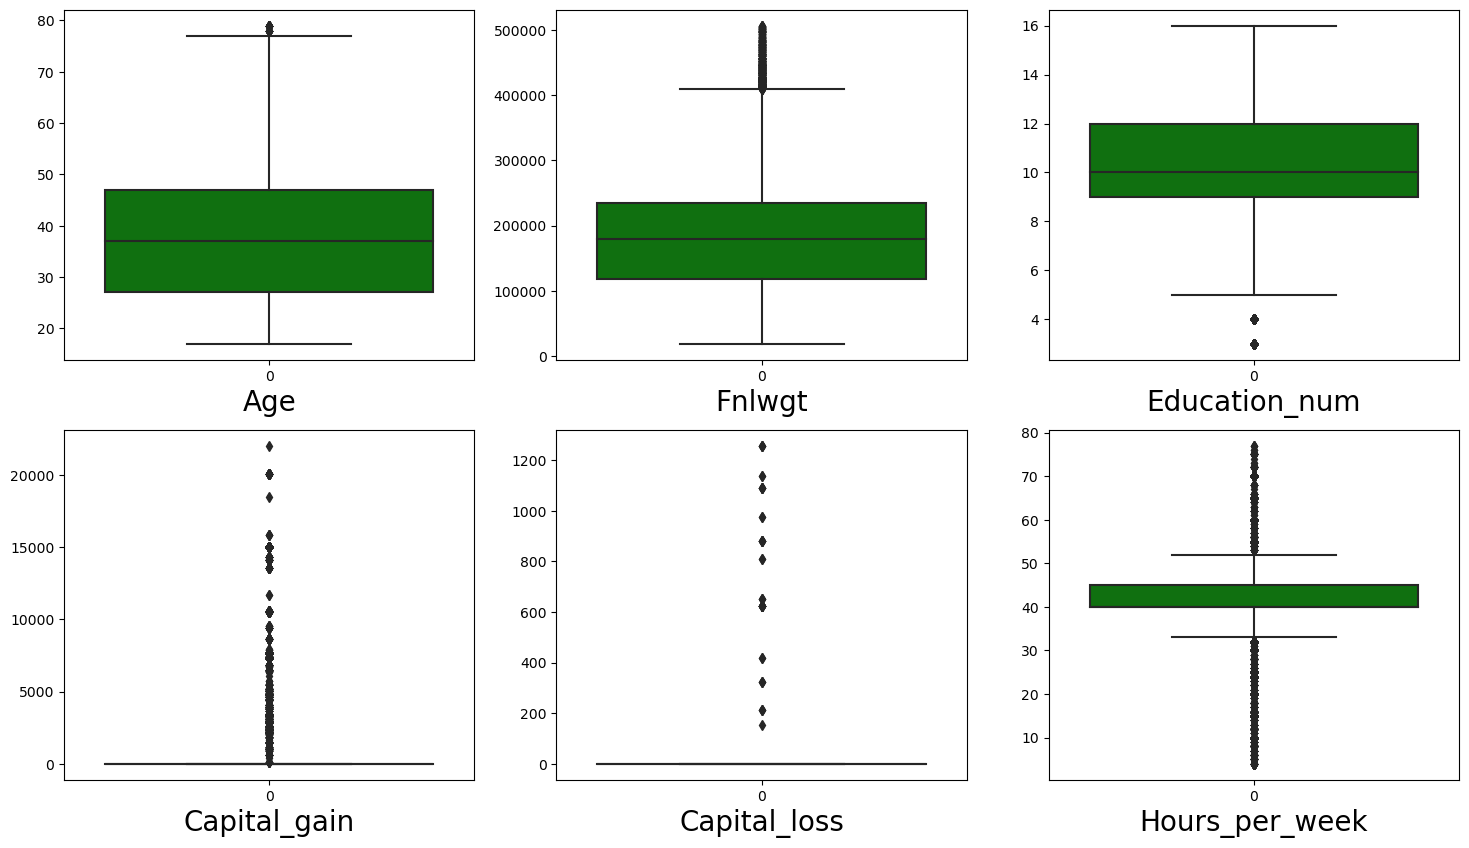

In [31]:
plt.figure(figsize=(18,10))
plotnumber=1

for column in Numerical:
    if plotnumber<=6:
        ax=plt.subplot(2,3,plotnumber)
        sns.boxplot(df[column],color='g')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

In [32]:
# some outliers removed 
# let's check the data skewness
df.skew()

Age                0.484822
Workclass          0.081802
Fnlwgt             0.629037
Education         -0.955723
Education_num     -0.145695
Marital_status    -0.045059
Occupation         0.013496
Relationship       0.753378
Race              -2.587054
Sex               -0.688876
Capital_gain       4.928795
Capital_loss      29.504415
Hours_per_week    -0.358726
Native_country    -5.411057
Income             1.322128
dtype: float64

In [33]:
# some continous features are positively skewed such as capital gain and capital loss 
# skewnes of categorical features are of no relevance 

In [34]:
df.corr()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
Age,1.000000,0.030416,-0.077342,-0.003984,0.044602,-0.286029,-0.001196,-0.270566,0.020581,0.089817,0.132521,0.023470,0.090644,0.035621,0.241574
Workclass,0.030416,1.000000,-0.026825,0.001559,-0.001812,-0.016039,0.008068,-0.057876,0.066438,0.069649,0.011463,-0.010714,0.028328,0.002607,-0.007850
Fnlwgt,-0.077342,-0.026825,1.000000,-0.021254,-0.040000,0.029528,-0.002084,0.015059,-0.102369,0.023150,-0.003736,0.003214,-0.018497,-0.105660,-0.011713
Education,-0.003984,0.001559,-0.021254,1.000000,0.346921,-0.037165,-0.042268,-0.009515,0.026706,-0.031634,0.026657,-0.000323,0.059634,0.091185,0.071005
Education_num,0.044602,-0.001812,-0.040000,0.346921,1.000000,-0.058419,0.072769,-0.092841,0.082854,0.003962,0.157647,0.007343,0.156044,0.147551,0.319622
Marital_status,-0.286029,-0.016039,0.029528,-0.037165,-0.058419,1.000000,0.036733,0.183957,-0.084552,-0.126222,-0.069563,-0.016472,-0.196855,-0.032029,-0.193939
Occupation,-0.001196,0.008068,-0.002084,-0.042268,0.072769,0.036733,1.000000,-0.038658,0.001550,0.050484,0.009435,-0.004829,-0.022046,0.018782,0.030327
Relationship,-0.270566,-0.057876,0.015059,-0.009515,-0.092841,0.183957,-0.038658,1.000000,-0.146544,-0.576987,-0.090042,0.030292,-0.262870,-0.012233,-0.247737
Race,0.020581,0.066438,-0.102369,0.026706,0.082854,-0.084552,0.001550,-0.146544,1.000000,0.125261,0.031085,-0.000082,0.057207,0.021478,0.094979
Sex,0.089817,0.069649,0.023150,-0.031634,0.003962,-0.126222,0.050484,-0.576987,0.125261,1.000000,0.069899,-0.027452,0.236827,-0.009278,0.211544


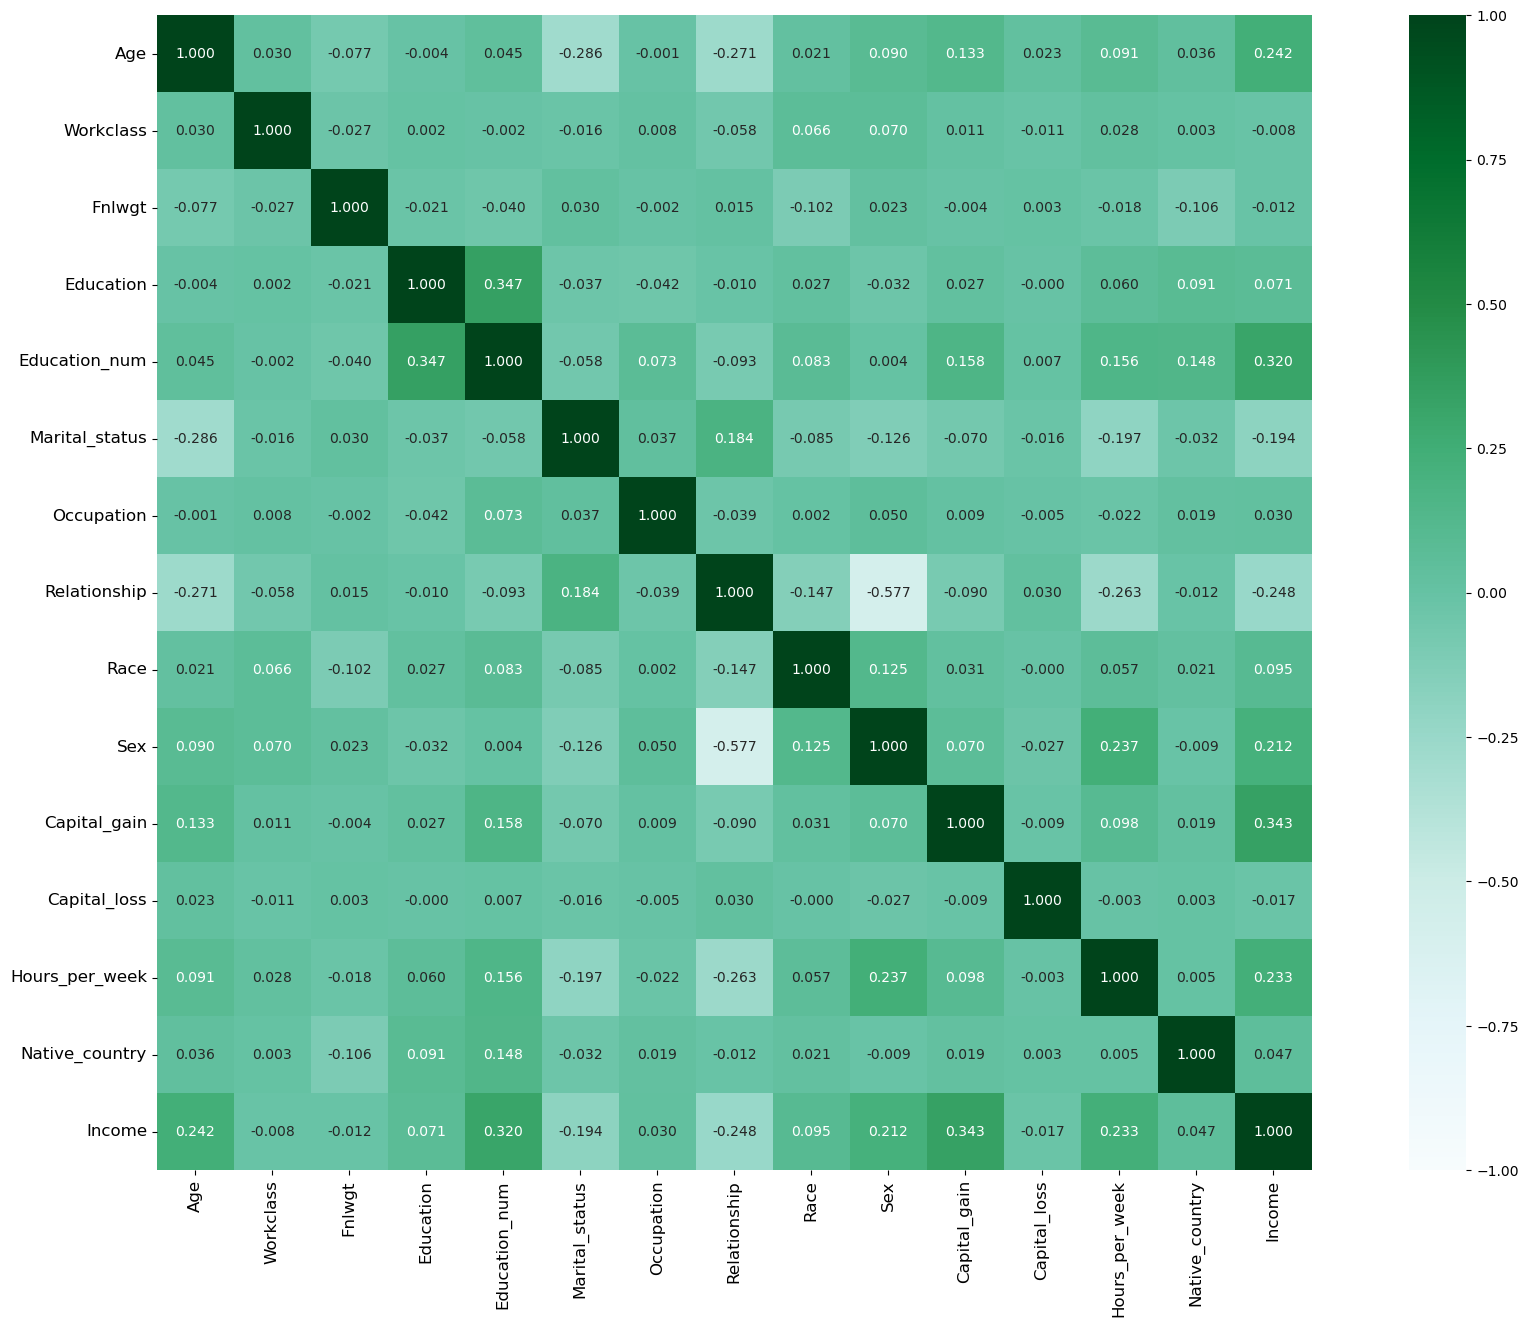

In [35]:
plt.figure(figsize=(25,15))
sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, square=True, fmt='0.3f', 
            annot_kws={'size':10}, cmap="BuGn")
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [36]:
# most of the features are very mildly correlated with label so we use PCA instead for feature selection 

In [37]:
# Check for Label balancing 
df.Income.value_counts()

Income
0    21527
1     6224
Name: count, dtype: int64

In [38]:
# data is not balanced hence we have to use SMOTE for balncing the label 

In [39]:
from imblearn.over_sampling import SMOTE

In [40]:
X = df.drop(['Income'], axis =1)
Y = df['Income']

In [41]:
# SMOTE is an oversampling technique 
new_sample = SMOTE()
X , Y = new_sample.fit_resample(X,Y)

In [42]:
Y.value_counts()

Income
0    21527
1    21527
Name: count, dtype: int64

In [43]:
# Data is balaced now 

In [44]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
X_scale = scaler.fit_transform(X)

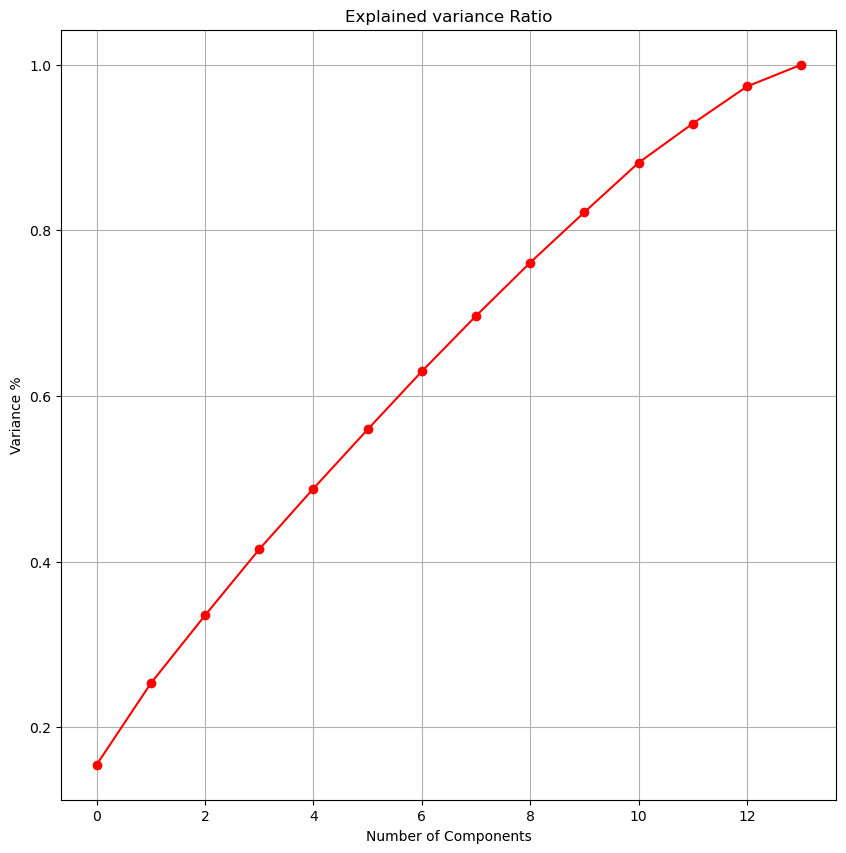

In [45]:
from sklearn.decomposition import PCA
pca = PCA()
#plot the graph to find the principal components
x_pca = pca.fit_transform(X_scale)
plt.figure(figsize=(10,10))
plt.plot(np.cumsum(pca.explained_variance_ratio_), 'ro-')
plt.xlabel('Number of Components')
plt.ylabel('Variance %')
plt.title('Explained variance Ratio')
plt.grid()

In [46]:
# 9 components contribute to over 90% of the data so we choose 9 components 

In [47]:
pca = PCA(n_components=9)
x_new =pca.fit_transform(X_scale) 

In [48]:
new_components = pd.DataFrame(x_new,columns=np.arange(9))

# Model Building

In [49]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,f1_score

In [50]:
X_train, X_test, Y_train, Y_test = train_test_split(new_components, Y, random_state=99, test_size=.3)

In [51]:
# Building Logistic Regression model 
X_train, X_test, Y_train, Y_test = train_test_split(new_components, Y, random_state=28, test_size=.3)
log_reg=LogisticRegression()
log_reg.fit(X_train,Y_train)
y_pred=log_reg.predict(X_test)
print(accuracy_score(Y_test, y_pred))
print(confusion_matrix(Y_test, y_pred))
print(classification_report(Y_test,y_pred))

0.7672060075869009
[[4844 1648]
 [1359 5066]]
              precision    recall  f1-score   support

           0       0.78      0.75      0.76      6492
           1       0.75      0.79      0.77      6425

    accuracy                           0.77     12917
   macro avg       0.77      0.77      0.77     12917
weighted avg       0.77      0.77      0.77     12917



In [52]:
# Applying classification models on dataset
model=[ LogisticRegression(),
        SVC(),
        GaussianNB(),
        DecisionTreeClassifier(),
        KNeighborsClassifier(n_neighbors = 3),
        RandomForestClassifier()
        ]
        
for m in model:
    m.fit(X_train,Y_train)
    y_pred=m.predict(X_test)
    print('\033[1m'+'Classification ML Algorithm Evaluation Matrix',m,'is' +'\033[0m')
    print('\n')
    print('\033[1m'+'Accuracy Score :'+'\033[0m\n', accuracy_score(Y_test, y_pred))
    print('\n')
    print('\033[1m'+'Confusion matrix :'+'\033[0m \n',confusion_matrix(Y_test, y_pred))
    print('\n')
    print('\033[1m'+'Classification Report :'+'\033[0m \n',classification_report(Y_test, y_pred))
    print('\n')
    print('============================================================================================================')

Classification ML Algorithm Evaluation Matrix LogisticRegression() is


Accuracy Score :
 0.7672060075869009


Confusion matrix : 
 [[4844 1648]
 [1359 5066]]


Classification Report : 
               precision    recall  f1-score   support

           0       0.78      0.75      0.76      6492
           1       0.75      0.79      0.77      6425

    accuracy                           0.77     12917
   macro avg       0.77      0.77      0.77     12917
weighted avg       0.77      0.77      0.77     12917



Classification ML Algorithm Evaluation Matrix SVC() is


Accuracy Score :
 0.8254238600294186


Confusion matrix : 
 [[4930 1562]
 [ 693 5732]]


Classification Report : 
               precision    recall  f1-score   support

           0       0.88      0.76      0.81      6492
           1       0.79      0.89      0.84      6425

    accuracy                           0.83     12917
   macro avg       0.83      0.83      0.82     12917
weighted avg       0.83      0.83      0

In [85]:
# Accuracy of Random forest is more so we choose Random forest classifier to build final model by tuning its parameter 

In [54]:

from sklearn.model_selection import GridSearchCV

In [57]:
parameter= {'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600,]
             }

In [ ]:
GCV = GridSearchCV(RandomForestClassifier(),parameter,verbose=10)
#GCV.fit(X_train,Y_train)

Fitting 5 folds for each of 1188 candidates, totalling 5940 fits
[CV 1/5; 1/1188] START bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200
[CV 1/5; 1/1188] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=nan total time=   0.0s
[CV 2/5; 1/1188] START bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200
[CV 2/5; 1/1188] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=nan total time=   0.0s
[CV 3/5; 1/1188] START bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200
[CV 3/5; 1/1188] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=nan total time=   0.0s
[CV 4/5; 1/1188] START bootstrap=True, max_depth=10, max_features=au

In [1]:
GCV.best_params_   # my pc taking too long to compute the parameters so i choose my own instead

NameError: name 'GCV' is not defined

# Final model

In [55]:
final_model =RandomForestClassifier(bootstrap=True,max_depth = 50,min_samples_leaf=4,min_samples_split=2,n_estimators=200)
final_model.fit(X_train,Y_train)
y_pred = final_model.predict(X_test)

In [56]:
print(accuracy_score(Y_test,y_pred))

0.8454749554850197


In [61]:
import joblib
joblib.dump(final_model,'Census_Income_Final.pkl')

['Census_Income_Final.pkl']